# Predicting Optimum Clusters For Iris Dataset

## Author: Rahul Kulkarni

### Problem Statement:
Predicting the number of clusters in the dataset using various clustering models.

### Importing Libraries 

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

In [2]:
iris_df = pd.read_csv('D:\GRIP_Tasks\Iris.csv')
features = iris_df[['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm']]
iris_df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


### Clustering Models

There are various models that we can use, but we will test using the following algorithms:
1. K-means

#### K-Means

In [3]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

In [4]:
features_std = StandardScaler().fit_transform(features)
features_std

array([[-9.00681170e-01,  1.03205722e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00, -1.24957601e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.38535265e+00,  3.37848329e-01, -1.39813811e+00,
        -1.31297673e+00],
       [-1.50652052e+00,  1.06445364e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.02184904e+00,  1.26346019e+00, -1.34127240e+00,
        -1.31297673e+00],
       [-5.37177559e-01,  1.95766909e+00, -1.17067529e+00,
        -1.05003079e+00],
       [-1.50652052e+00,  8.00654259e-01, -1.34127240e+00,
        -1.18150376e+00],
       [-1.02184904e+00,  8.00654259e-01, -1.28440670e+00,
        -1.31297673e+00],
       [-1.74885626e+00, -3.56360566e-01, -1.34127240e+00,
        -1.31297673e+00],
       [-1.14301691e+00,  1.06445364e-01, -1.28440670e+00,
        -1.44444970e+00],
       [-5.37177559e-01,  1.49486315e+00, -1.28440670e+00,
        -1.31297673e+00],
       [-1.26418478e+00,  8.00654259e-01, -1.22754100e+00,
      

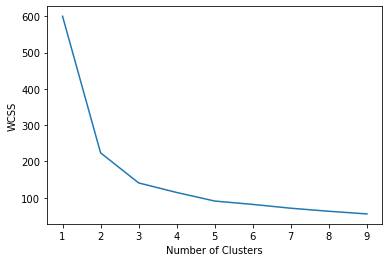

In [5]:
wcss = []
for i in range(1,10):
    k_means = KMeans(init = "k-means++", n_clusters = i, n_init = 10)
    k_means.fit(features_std)
    wcss.append(k_means.inertia_)
plt.plot(range(1, 10), wcss)
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above plot we can clearly see that the optimum number of clusters is 3. It is pretty clear that increasing the clusters will cause decrease in the WCSS value. But the optimum solution lies at a point where the gradient of the curve suddenly decreases and is known as the elbow point. For above plot elbow point is 3 clusters.

Let's create a k-means model with number of clusters equal to 3.

In [7]:
k_means = KMeans(init = "k-means++", n_clusters = 3, n_init = 10)
k_means.fit(features_std)
species_predict = k_means.predict(features_std)

Now let's visualize the clusters on a plot

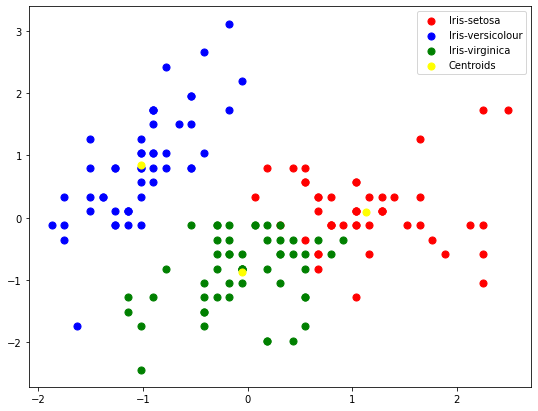

In [21]:
plt.figure(figsize=(9,7))
plt.scatter(features_std[species_predict == 0, 0], features_std[species_predict == 0, 1], 
            s = 50, c = 'red', label = 'Iris-setosa')
plt.scatter(features_std[species_predict == 1, 0], features_std[species_predict == 1, 1], 
            s = 50, c = 'blue', label = 'Iris-versicolour')
plt.scatter(features_std[species_predict == 2, 0], features_std[species_predict == 2, 1],
            s = 50, c = 'green', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(k_means.cluster_centers_[:, 0], k_means.cluster_centers_[:,1], 
            s = 50, c = 'yellow', label = 'Centroids')

plt.legend()

### Conclusion

After calculating metrics such as WCSS it is clear that optimum number of clusters for the data set is 3.